In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Data Representation**

In [286]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### **Data Wrangling**

In [288]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [289]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [290]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


##### **Exploratory Data Analysis (EDA)**

#### **Univariate Analysis**

**Geography Column**

In [291]:
country_counts= df["Geography"].value_counts()
country_freq = df["Geography"].value_counts(normalize=True) *100


freq_table =pd.DataFrame({'Count':country_counts, 'Percentage %':country_freq})
freq_table

,Count,Percentage %
Geography,,
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


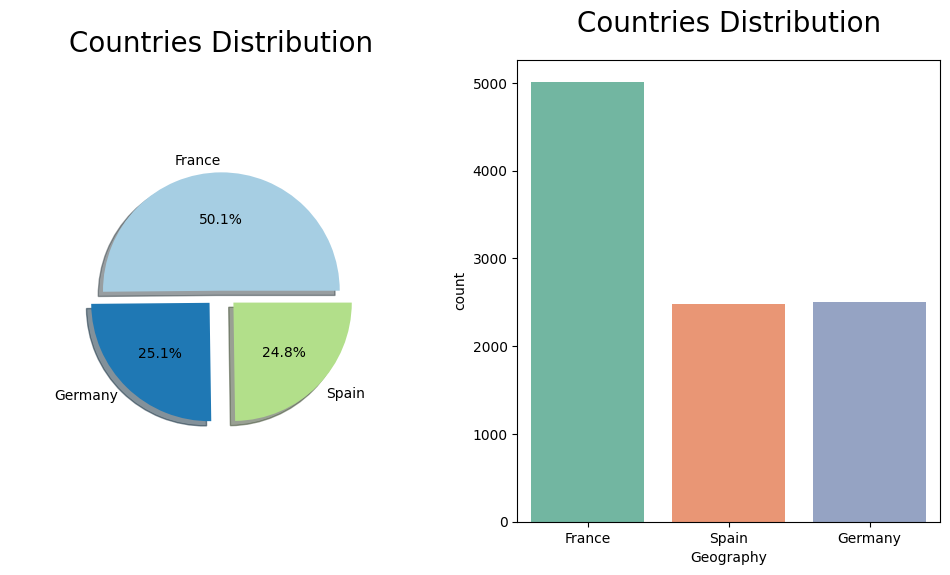

In [292]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2, 1)
plt.pie(
    country_counts,
    labels=df['Geography'].value_counts().index,
    explode = [0,0.1,0.1],
    colors=sns.color_palette("Paired"),
    autopct='%1.1f%%', 
    radius=0.7,
    shadow=True,
)
plt.title('Countries Distribution',size=20,pad=20)

plt.subplot(1,2, 2)
sns.countplot(x='Geography', data=df,palette = 'Set2',hue='Geography')
plt.title('Countries Distribution',size=20,pad=20)

plt.show()

**Age Column**

In [293]:
df["Age"].nunique()

70

In [294]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

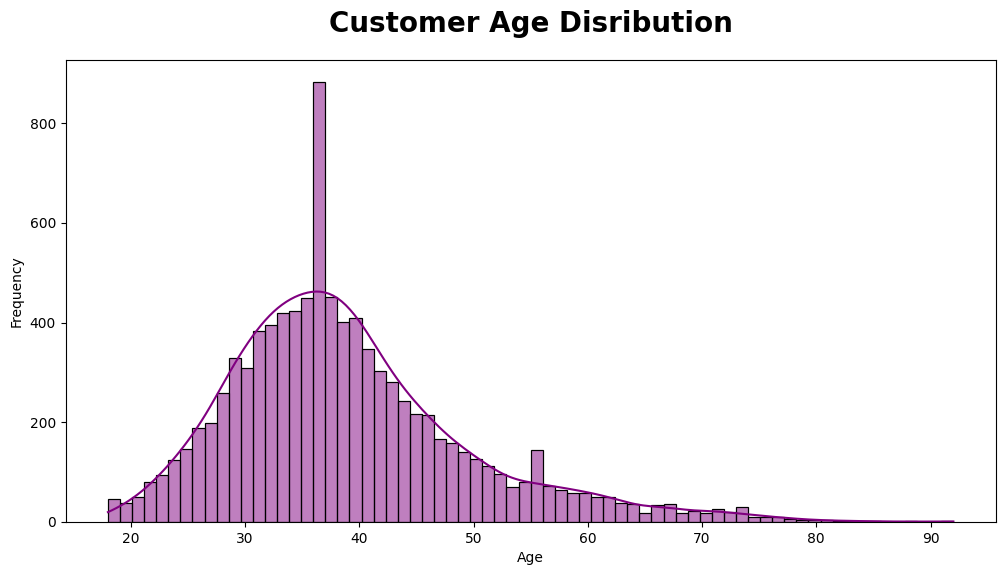

In [295]:
plt.figure(figsize=(12, 6))
sns.histplot(
    df["Age"],
    bins=70,
    kde=True,
    color='purple',
    stat='frequency'
)
plt.title("Customer Age Disribution",fontweight="black",size=20,pad=20)
plt.xlabel('Age')
plt.show()

**Terune Column** 

In [296]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

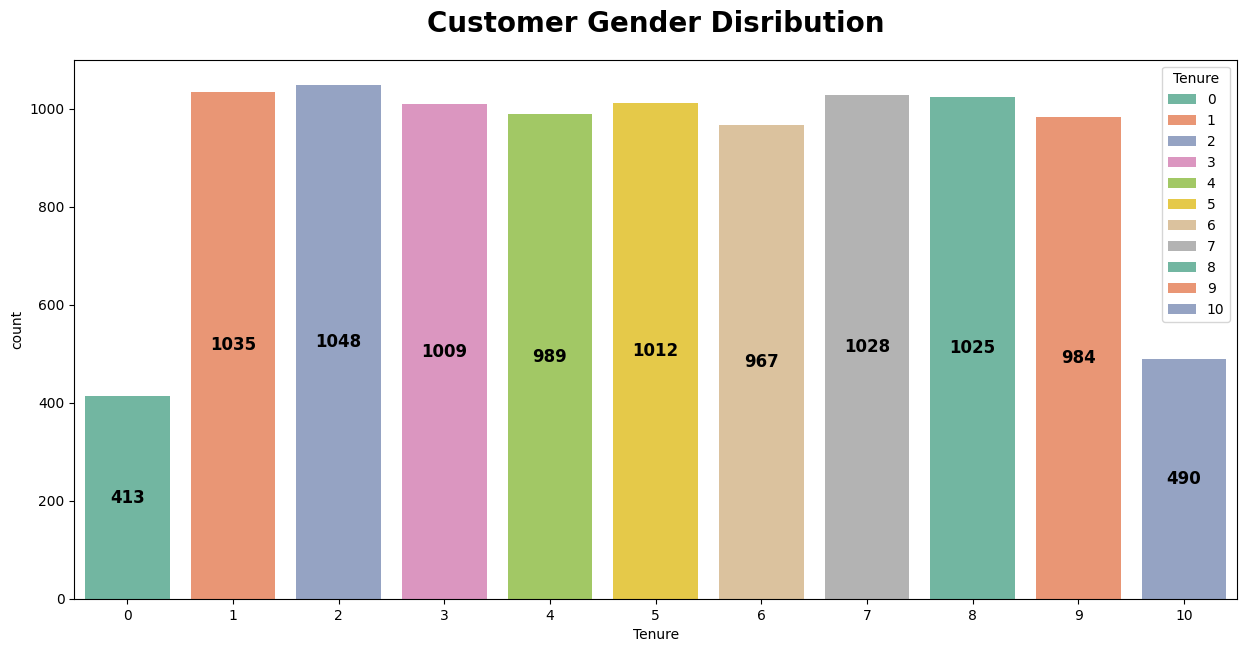

In [297]:
plt.figure(figsize = (15, 7))
ax = sns.countplot(data = df, x = 'Tenure', palette = 'Set2', hue="Tenure")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
    
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

**Balance , NumOfProducts & HasCrCard Columns** 

Text(0.5, 1.0, 'Customer have Credit Card ?')

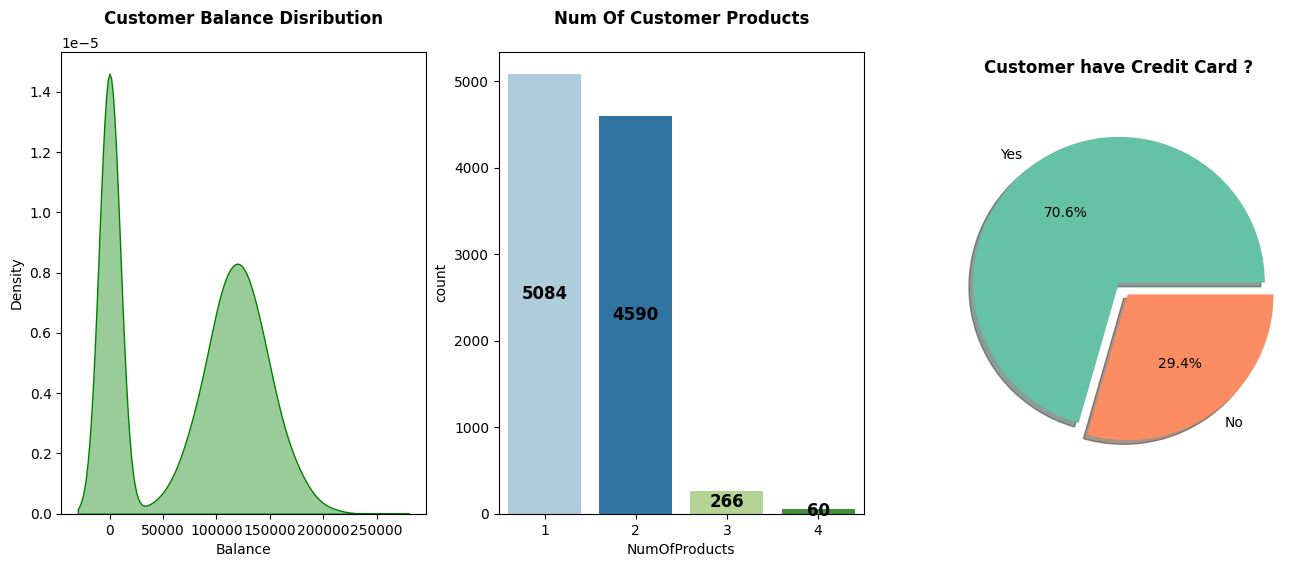

In [298]:
plt.figure(figsize=(16, 6))

plt.subplot(1,3,1)
sns.kdeplot(
    data = df,
    x = 'Balance', 
    fill = True,
    color="green",
    alpha = 0.4
    )
plt.title("Customer Balance Disribution",fontweight="black",pad=20)

plt.subplot(1,3,2)
ax=sns.countplot(
    x="NumOfProducts",
    data=df,
    palette="Paired",
    hue="NumOfProducts",
    legend=False
    )
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
plt.title("Num Of Customer Products",fontweight="black",pad=20)

plt.subplot(1,3,3)
plt.pie(
    df['HasCrCard'].value_counts(),
    autopct = '%1.1f%%',
    labels = ['Yes', 'No'], 
    explode = [0,0.1],
    colors=sns.set_palette("Set2"),
    shadow=True)
plt.title("Customer have Credit Card ?",fontweight="black",pad=20)

**IsActiveMember Column** 

In [299]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

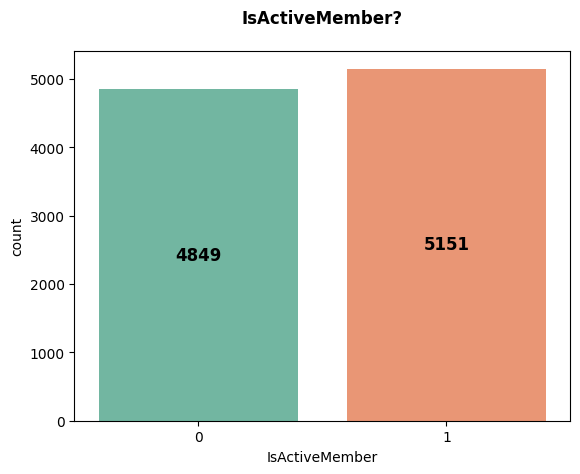

In [300]:
ax = sns.countplot(
    data = df, 
    x = 'IsActiveMember', 
    palette = 'Set2', 
    hue="IsActiveMember",
    legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12,fontweight="black")
plt.title("IsActiveMember?",fontweight="black",pad=20)
plt.show()

**EstimatedSalary Column** 

In [301]:
df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

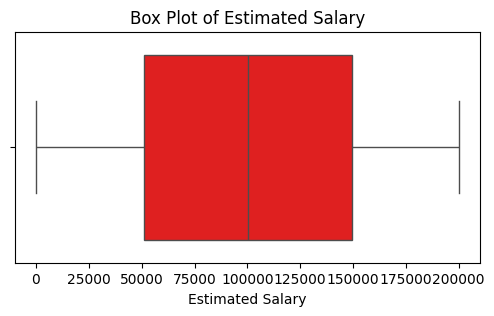

In [302]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['EstimatedSalary'], color='red')
plt.title('Box Plot of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.show()

**Exited Column**  

In [303]:
Exists_count = df["Exited"].value_counts()
Exists_perc = df["Exited"].value_counts(normalize=True) * 100 

Exists_freq_table = pd.DataFrame({'Count':Exists_count, 'Percentage %':Exists_perc})
Exists_freq_table

,Count,Percentage %
Exited,,
0,7963,79.63
1,2037,20.37


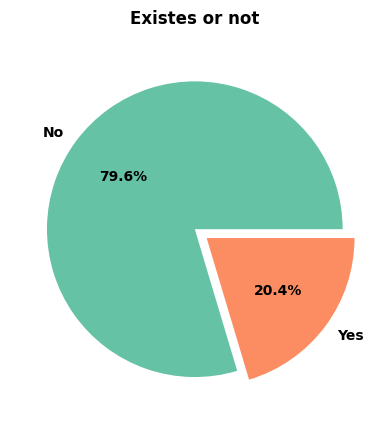

In [304]:
plt.pie(
    df['Exited'].value_counts(), 
    autopct = '%1.1f%%', 
    labels = ['No', 'Yes'], 
    explode = [0,0.1], 
    textprops={"fontweight":"black"})
plt.title("Existes or not",fontweight="black",pad=15)
plt.show()

#### **Bivariate Analysis**

In [305]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Age vs CreditScore**

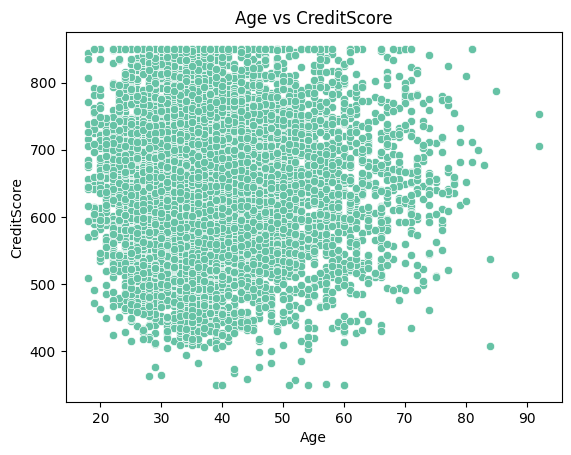

In [306]:
sns.scatterplot(
    x="Age" , y="CreditScore" , data=df
)
plt.title('Age vs CreditScore')
plt.show()

Categorical Features vs Exited columns

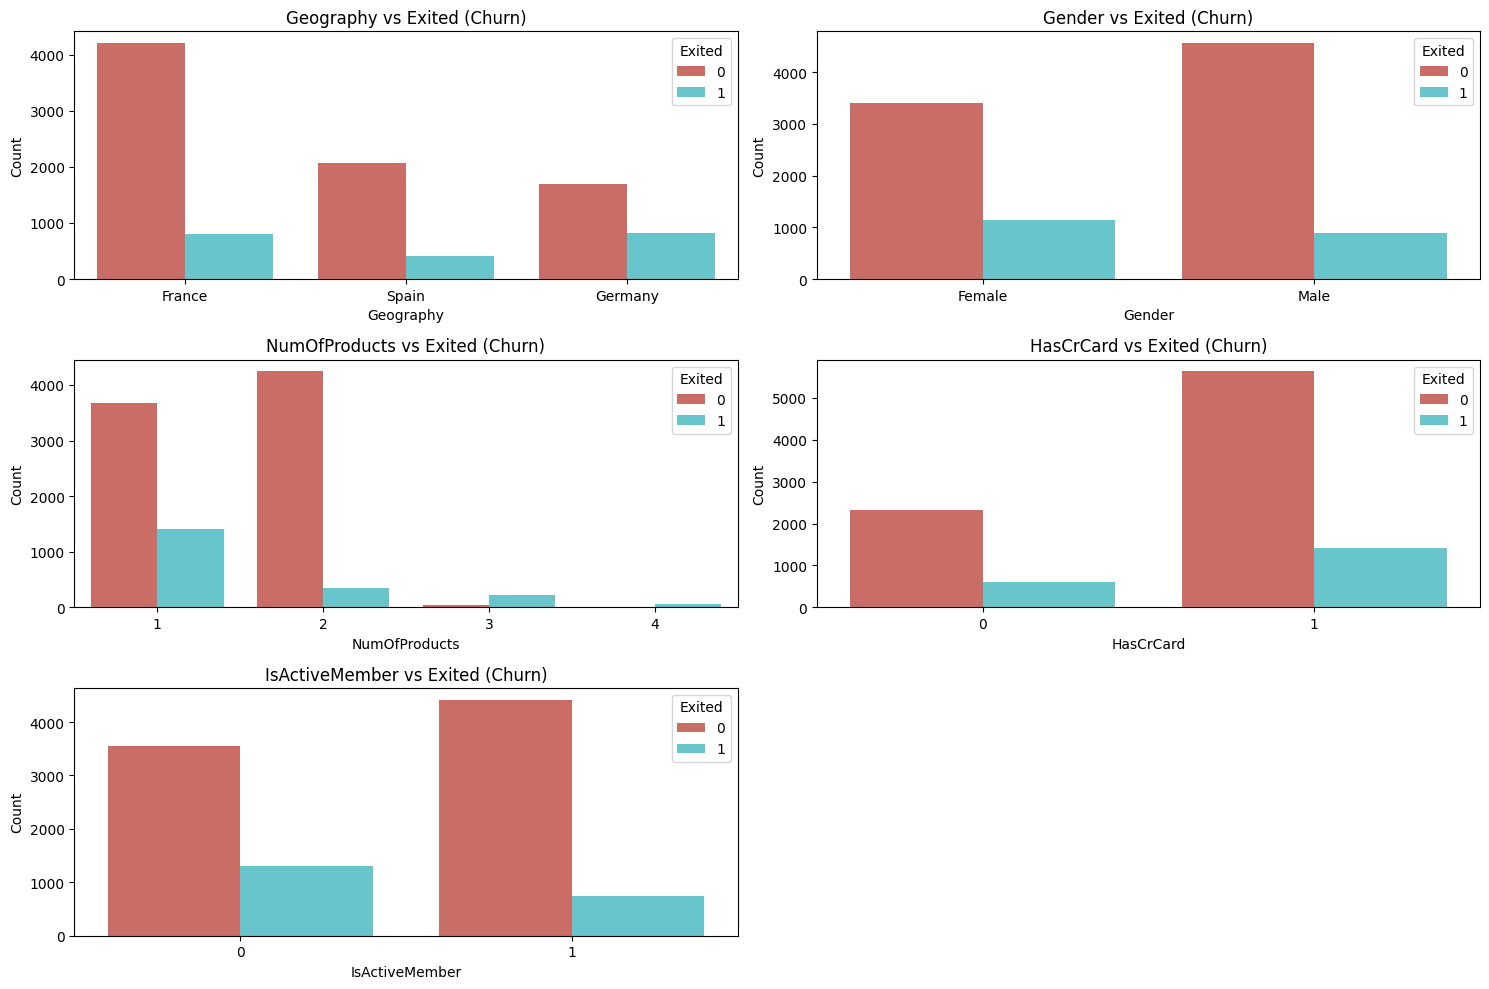

In [307]:
categorical_col=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
plt.figure(figsize = (15, 10))
for ind, val in enumerate(categorical_col):
    plt.subplot(3,2, ind + 1)
    sns.countplot(data = df, x = val, hue = 'Exited', palette = 'hls')
    plt.title(f'{val} vs Exited (Churn)')
    plt.xlabel(val)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**CreditScore , Age , Tenure & Balance vs Balance & EstimatedSalary**

<Figure size 1400x1000 with 0 Axes>

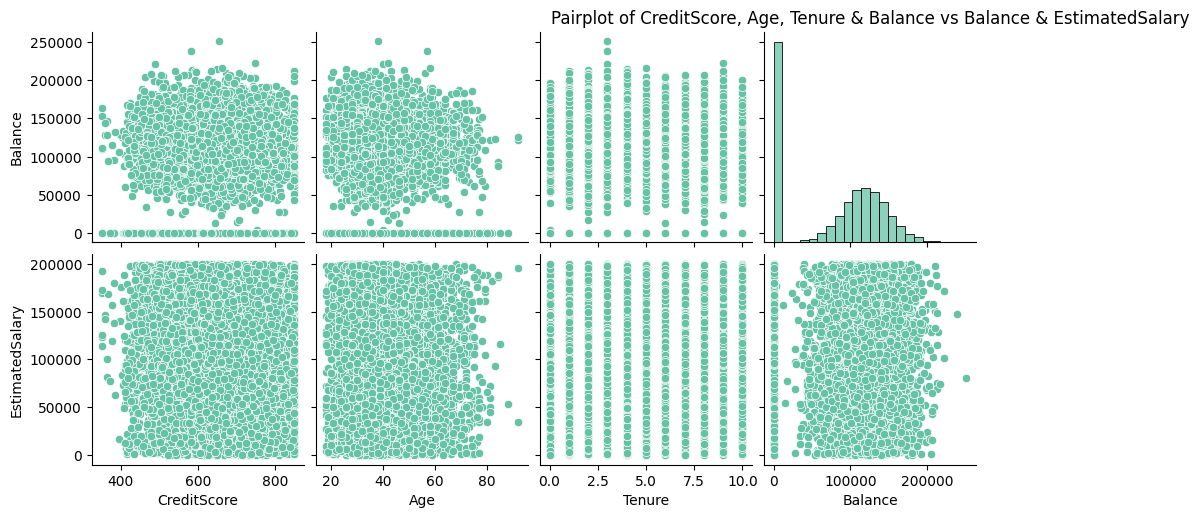

In [308]:
plt.figure(figsize = (14, 10))
sns.pairplot(
            df, 
             kind='scatter',
             x_vars=["CreditScore","Age","Tenure","Balance"],
             y_vars=["Balance","EstimatedSalary"] , 
             )
plt.title('Pairplot of CreditScore, Age, Tenure & Balance vs Balance & EstimatedSalary')
plt.show()

#### **Multivariate Analysis**

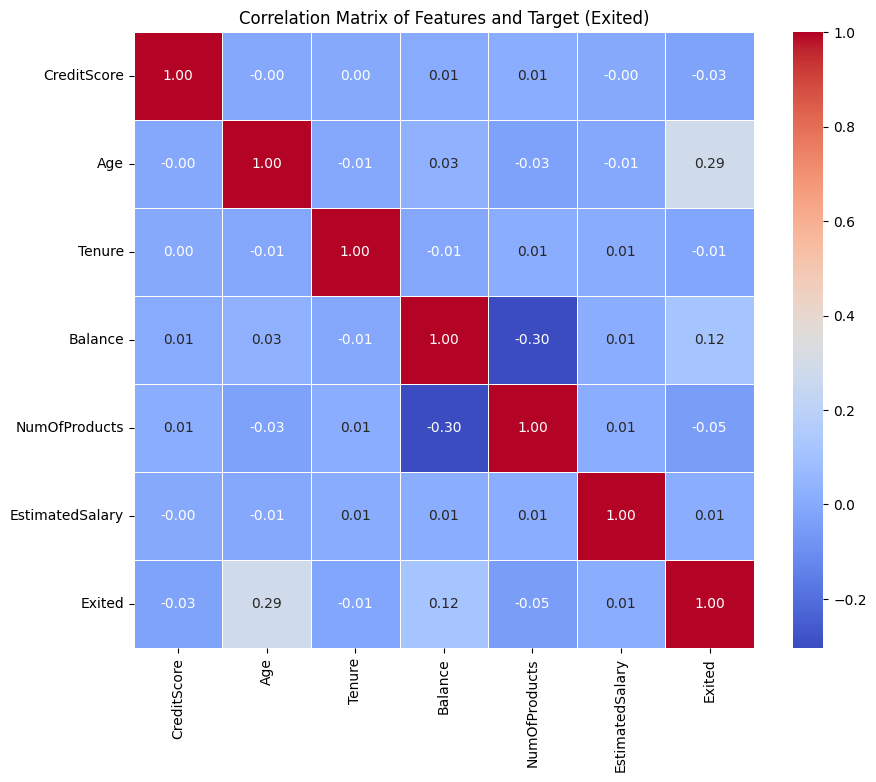

In [309]:
cols_correlation = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr = df[cols_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, fmt = '0.2f', cmap = 'coolwarm', lw = 0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()